In [1]:
import pandas as pd
import matplotlib.pyplot as plt

D = pd.read_csv('D:\Desktop\Project\FlightSalesClean.csv')
print('loading Dataset Compelete!')

In [2]:
#this function is to show values on chart's bars

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


the most popular paths and their counts are:
     path  count
0  15-66  16770
1  66-15  16410
2  66-42   7821
3  42-66   6494
4   3-66   5952


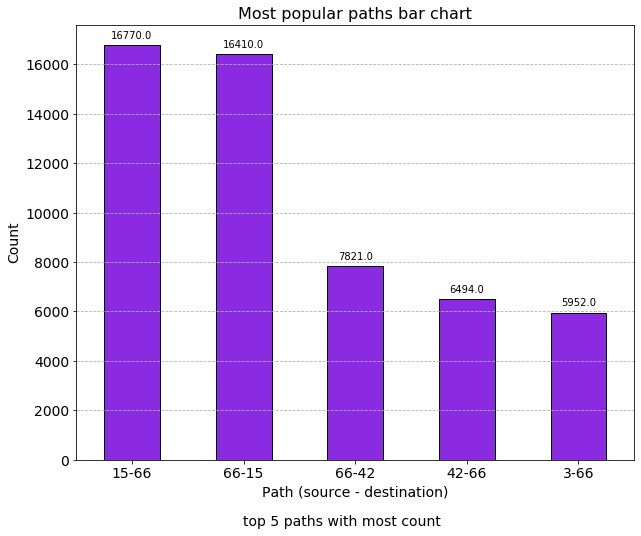

In [3]:
#PATH


#sort popular paths in descending order based on quantity
most_path = D['path'].value_counts() 

#for printing the result in good look:
path_printable_table = most_path[:5].to_frame().reset_index()
path_printable_table .rename(columns = {'index':'path', 'path' : 'count'} , inplace = True)
print('the most popular paths and their counts are:\n',path_printable_table)

#plot top 5 popular paths
path_plot = most_path[:5].plot.bar(rot=0 ,edgecolor="black", color = 'blueviolet' , fontsize = 14 , figsize = (10,8))
plt.figtext(0.5, 0.01, "top 5 paths with most count  ", wrap=True, horizontalalignment='center', fontsize=14)
plt.title('Most popular paths bar chart' , fontsize = 16)
plt.ylabel('Count' , fontsize = 14)
plt.xlabel('Path (source - destination)' , fontsize = 14)
plt.grid(b=None, which='major' , axis='y',linestyle='--')
add_value_labels(path_plot)
plt.show()



the most popular sources and their counts are:
    City  source-count
0    66         50457
1    15         40413
2    30         21433
3    42         16684
4     3         12345


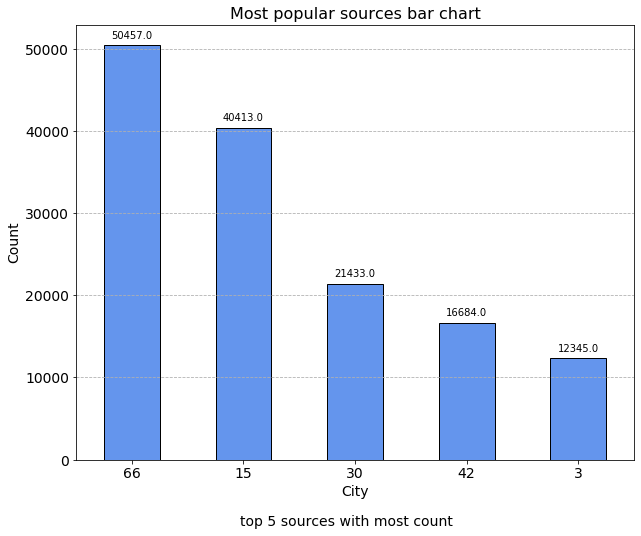

In [4]:
#SOURCE


#sort sources based on quantity in descending order
most_source = D['source'].value_counts()


#for printing the result in good look:
source_printable_table = most_source[:5].to_frame().reset_index()
source_printable_table .rename(columns = {'index':'City','source' : 'source-count'} , inplace = True)
print('the most popular sources and their counts are:\n',source_printable_table)

#plot 5 most popular sources
source_plot = most_source[:5].plot.bar(rot=0 , edgecolor="black",color = 'cornflowerblue', fontsize = 14, figsize = (10,8))
plt.title('Most popular sources bar chart' , fontsize = 16)
plt.figtext(0.5,  0.01, "top 5 sources with most count", wrap=True, horizontalalignment='center', fontsize=14)
plt.ylabel('Count' , fontsize = 14)
plt.xlabel('City' , fontsize = 14)
plt.grid(b=None, which='major' , axis='y',linestyle='--')
add_value_labels(source_plot)
plt.show()


the most popular destinations and their counts are:
    city  dextination-count
0    66              49454
1    15              38502
2    30              22996
3    42              18899
4     3              11389


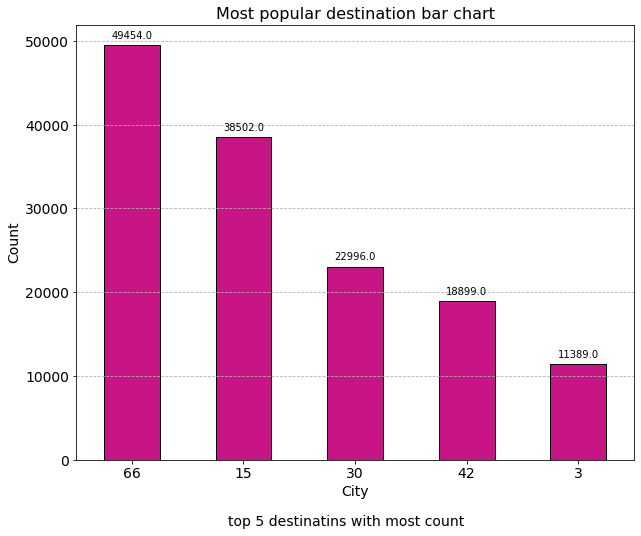

In [5]:
# DESTINATION




#sort destinations based on quantity in descending order
most_destination = D['destination'].value_counts()


#for printing the result in good look:
destination_printable_table = most_destination[:5].to_frame().reset_index()
destination_printable_table .rename(columns = {'index':'city', 'destination' : 'dextination-count'} , inplace = True) #change the columns name
print('the most popular destinations and their counts are:\n',destination_printable_table)

#plot 5 most popular destinations
des_plot =most_destination[:5].plot.bar(rot=0 ,edgecolor="black", color = 'mediumvioletred', fontsize = 14, figsize = (10,8))
plt.title('Most popular destination bar chart' , fontsize = 16 )
plt.figtext(0.5,  0.01, "top 5 destinatins with most count", wrap=True, horizontalalignment='center', fontsize=14)
plt.ylabel('Count' , fontsize = 14)
plt.xlabel('City' , fontsize = 14)
plt.grid(b=None, which='major' , axis='y',linestyle='--')
add_value_labels(des_plot)
plt.show()




the most popular cities and the count of them being source and destination are:
    City  destination  source
0    66        49454   50457
1    15        38502   40413
2    30        22996   21433
3    42        18899   16684
4     3        11389   12345


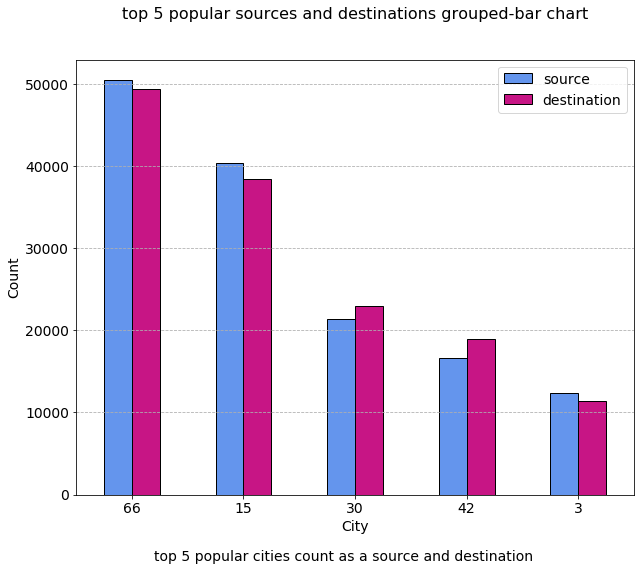

In [6]:
#plot the last two plots together for a better look

#convert two series fisrt 5 rows to df to plot grouped bar chart
most_destination_df = most_destination[:5].to_frame().reset_index()
most_source_df = most_source[:5].to_frame().reset_index()

#for a better printing look of DF:
#change the columns names
most_destination_df.rename(columns = {'index':'City'} , inplace = True)
most_source_df.rename(columns = {'index':'City'}, inplace = True) 

#merge dfs of source and destination:
source_des_MERGE_df = most_destination_df.merge(most_source_df)

print('the most popular cities and the count of them being source and destination are:\n',source_des_MERGE_df[:5])

#plot
source_des_MERGE_df.plot(rot = 0 ,x="City", y=["source", "destination"], kind="bar", edgecolor="black",color = ['cornflowerblue', 'mediumvioletred'],fontsize = 14 ,figsize = (10,8))
plt.title('top 5 popular sources and destinations grouped-bar chart' , fontsize = 16 , y=1.08)
plt.figtext(0.5,  0.01, "top 5 popular cities count as a source and destination ", wrap=True, horizontalalignment='center', fontsize=14)
plt.ylabel('Count' , fontsize = 14)
plt.xlabel('City' , fontsize = 14)
plt.legend(fontsize = 14)
plt.grid(b=None, which='major' , axis='y',linestyle='--')
plt.show()


